Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [5]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('loan.csv')

In [6]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [7]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [9]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [12]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [14]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [16]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [17]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

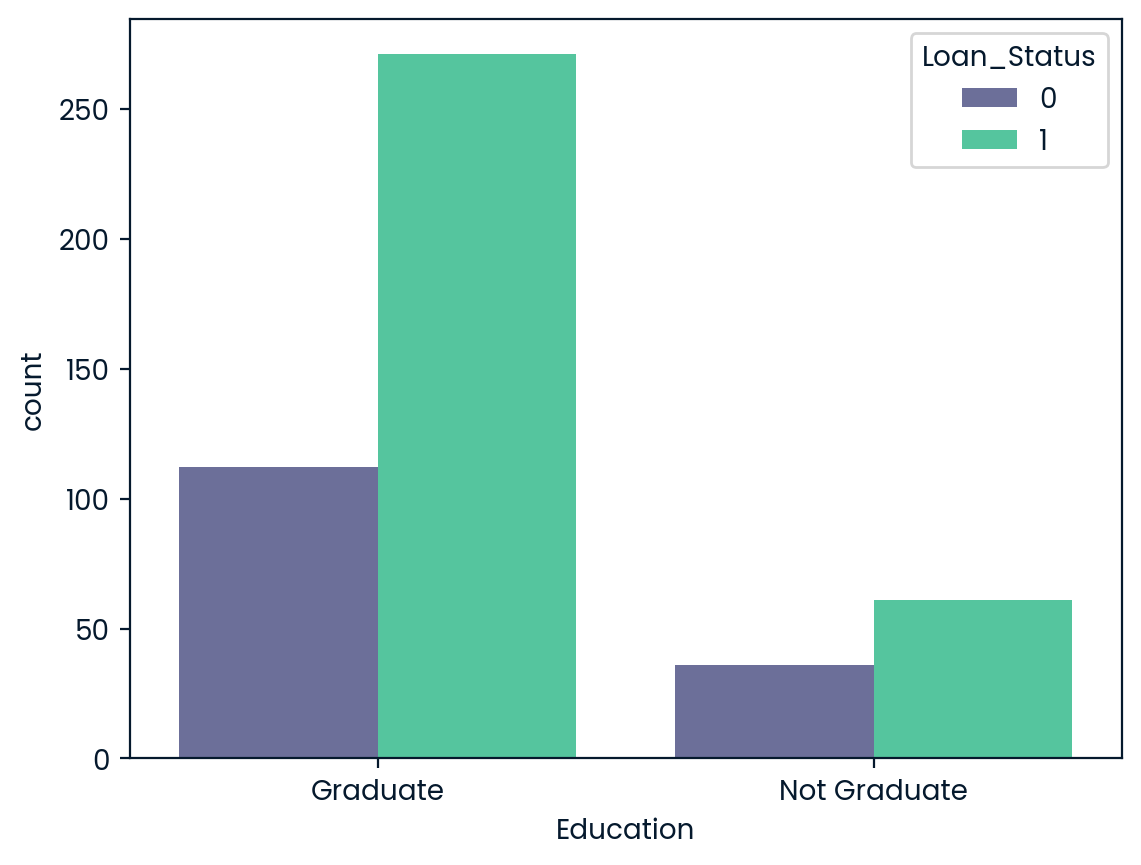

In [18]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

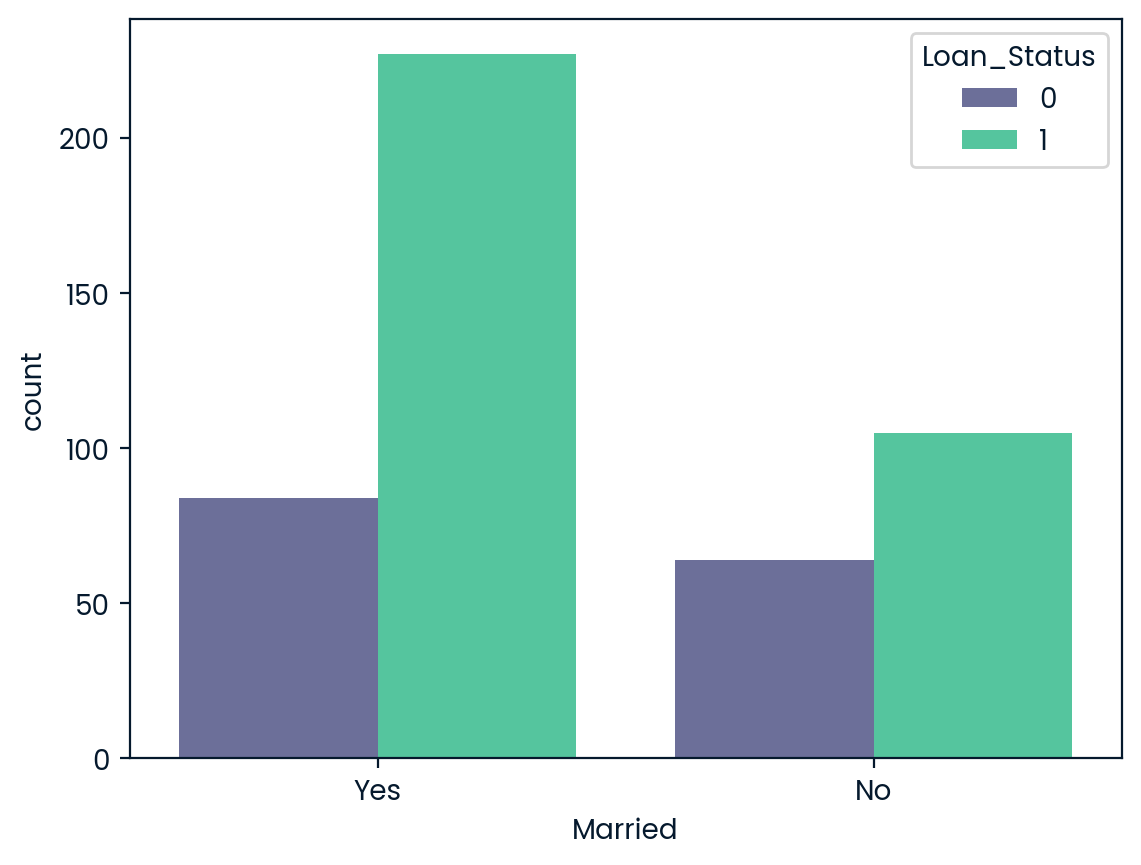

In [19]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [20]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [21]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [23]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [24]:
print(X)
print(Y)

     Gender  Married  ... Credit_History  Property_Area
1         1        1  ...            1.0              0
2         1        1  ...            1.0              2
3         1        1  ...            1.0              2
4         1        0  ...            1.0              2
5         1        1  ...            1.0              2
..      ...      ...  ...            ...            ...
609       0        0  ...            1.0              0
610       1        1  ...            1.0              0
611       1        1  ...            1.0              2
612       1        1  ...            1.0              2
613       0        0  ...            0.0              1

[480 rows x 11 columns]
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


Train Test Split

In [25]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:

Support Vector Machine Model

In [27]:
classifier = svm.SVC(kernel='linear')

In [28]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [29]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [30]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [31]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [32]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


Building a Predictive System

In [39]:
# Convert the input data to match the model's training format
input_data = ('LP003000','Male','No',0,'Graduate','No',1000,0,150,240,0,'Urban','Y')

# Encoding the input data
input_data_encoded = [0 if input_data[1]=='Male' else 1, # Gender
                      0 if input_data[2]=='No' else 1, # Married
                      0 if input_data[3]==0 else (1 if input_data[3]==1 else (2 if input_data[3]==2 else 3)), # Dependents
                      0 if input_data[4]=='Graduate' else 1, # Education
                      0 if input_data[5]=='No' else 1, # Self_Employed
                      input_data[6], # ApplicantIncome
                      input_data[7], # CoapplicantIncome
                      input_data[8], # LoanAmount
                      input_data[9], # Loan_Amount_Term
                      input_data[10], # Credit_History
                      0 if input_data[11]=='Urban' else (1 if input_data[11]=='Semiurban' else 2)] # Property_Area

# Reshape the array as we are predicting for one instance
input_data_reshaped = [input_data_encoded]

# Predict
predicted_loan_status = classifier.predict(input_data_reshaped)
predicted_loan_status = 'Y' if predicted_loan_status[0] == 1 else 'N'

predicted_loan_status

'N'

# Loan Eligibility Prediction Project Overview

This project aims to predict loan eligibility based on customer details using machine learning algorithms. The process involves several key steps, from data preprocessing to model training and evaluation. Here's an overview of the project steps:

## Step 1: Data Collection
The first step involves collecting the dataset that contains various details about the loan applicants. This dataset includes columns such as `Loan_ID`, `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History`, `Property_Area`, and `Loan_Status`.

## Step 2: Data Preprocessing
Data preprocessing is crucial to prepare the dataset for the machine learning model. This step includes:
- Handling missing values
- Encoding categorical variables into numerical values
- Splitting the dataset into features (`X`) and target variable (`Loan_Status`)

## Step 3: Feature Selection
Selecting the right features that contribute most to the prediction variable or output in which we are interested. Removing irrelevant or partially relevant features can increase the accuracy of the model and reduce overfitting.

## Step 4: Splitting the Dataset
The dataset is split into training and testing sets to evaluate the performance of the model. The `X_train` and `X_test` dataframes contain the features for training and testing, respectively.

## Step 5: Model Training
A machine learning classifier is trained using the training dataset. This involves feeding the training data into the classifier and allowing it to learn the relationships between the features and the target variable.

## Step 6: Model Evaluation
After training the model, it is evaluated using the test dataset to check its performance. Metrics such as accuracy, precision, recall, and F1-score can be used for evaluation.

## Step 7: Building a Predictive System
Finally, a predictive system is built where new input data can be fed into the model to predict the loan eligibility (`Y` for Yes, `N` for No). The input data must be preprocessed and encoded to match the format the model was trained on before making predictions.

This project leverages machine learning to automate the decision-making process for loan eligibility, making it faster and potentially more accurate than manual evaluations.